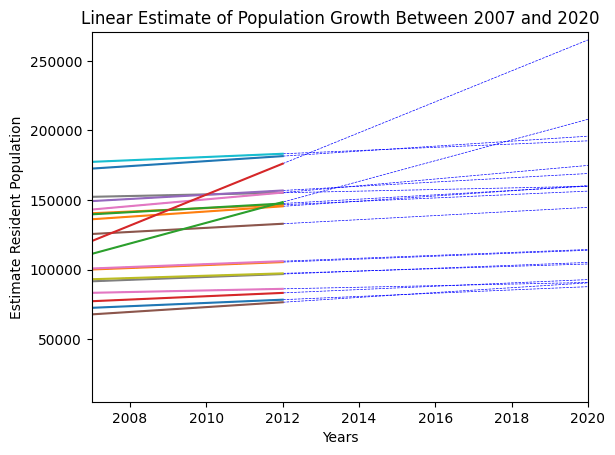

In [17]:
import pandas as pd
import numpy as np
import random
import seaborn as sns
import matplotlib.pyplot as plt
import data

communities = data.communities
communities_summary = communities.loc[communities["Community Name"].str.contains(r"\(Suburb\)$")][["LGA","2007 ERP, total","2012 ERP, total"]]

lgas = {}
for ids, pop in communities_summary.iterrows():
    if isinstance(pop["2007 ERP, total"],float):
        if pop["LGA"] in lgas.keys():
            lgas[pop["LGA"]]=[lgas[pop["LGA"]][0]+pop["2007 ERP, total"],lgas[pop["LGA"]][1]+pop["2012 ERP, total"]]
        else:
            lgas[pop["LGA"]]=[pop["2007 ERP, total"],pop["2012 ERP, total"]]

plt.figure()
for key in lgas.keys():
    plt.axline([2007,lgas[key][0]], xy2 = [2012,lgas[key][1]], linestyle = "--", linewidth = 0.5, color = "blue")
    plt.plot([2007 ,2012],[lgas[key][0], lgas[key][1]])

plt.xlim(2007,2020)
plt.title("Linear Estimate of Population Growth Between 2007 and 2020")
plt.xlabel("Years")
plt.ylabel("Estimate Resident Population")
plt.show()




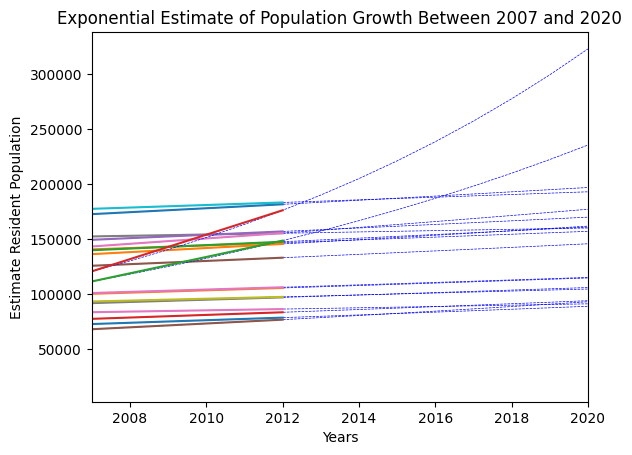

In [18]:


plt.figure()
x=[2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020]
y=[2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020]
for key in lgas.keys():
    newyvals=np.log(lgas[key])
    curve_fit = np.polyfit([2007,2012], newyvals, 1)
    for year in range(len(x)):
        y[year] = np.exp(curve_fit[1]) * np.exp(curve_fit[0]*x[year])
    plt.plot(x,y,linestyle = "--", linewidth = 0.5, color = "blue")
    plt.plot([2007 ,2012],[lgas[key][0], lgas[key][1]])

plt.xlim(2007,2020)
plt.title("Exponential Estimate of Population Growth Between 2007 and 2020")
plt.xlabel("Years")
plt.ylabel("Estimate Resident Population")
plt.show()